In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cars.csv')
data['Model Year'].astype(str)

new_df = data.drop(['Engine Type','Fuel Type','Transmission',
                      'Hybrid','Classification','Driveline','ID',
                      'Make','Number of Forward Gears','Highway mpg'], axis=1)

len(new_df)

5076

In [3]:
new_df.head()

,City mpg,Height,Horsepower,Length,Model Year,Torque,Width,Year
0,18,140,250,143,2009 Audi A3,236,202,2009
1,22,140,200,143,2009 Audi A3,207,202,2009
2,21,140,200,143,2009 Audi A3,207,202,2009
3,21,140,200,143,2009 Audi A3,207,202,2009
4,21,140,200,143,2009 Audi A3,207,202,2009


In [4]:
col_order = [4,0,2,5,3,6,1,7]
new_df=new_df[new_df.columns[col_order]]

new_df.head()

,Model Year,City mpg,Horsepower,Torque,Length,Width,Height,Year
0,2009 Audi A3,18,250,236,143,202,140,2009
1,2009 Audi A3,22,200,207,143,202,140,2009
2,2009 Audi A3,21,200,207,143,202,140,2009
3,2009 Audi A3,21,200,207,143,202,140,2009
4,2009 Audi A3,21,200,207,143,202,140,2009


In [5]:
new_df.tail()

,Model Year,City mpg,Horsepower,Torque,Length,Width,Height,Year
5071,2012 Honda Pilot,18,250,253,253,201,13,2012
5072,2012 Lamborghini Gallardo Coup,12,552,398,249,108,141,2012
5073,2012 Lamborghini Gallardo Spyder,12,552,398,249,108,160,2012
5074,2012 BMW 7 Series,17,315,330,210,110,200,2012
5075,2012 BMW 7 Series,17,315,330,94,110,200,2012


In [7]:
data_correlation = round(new_df.corr(),3)
data_correlation

,City mpg,Horsepower,Torque,Length,Width,Height,Year
City mpg,1.000,-0.702,-0.755,-0.019,-0.140,0.249,0.092
Horsepower,-0.702,1.000,0.938,0.017,0.036,-0.152,0.006
Torque,-0.755,0.938,1.000,0.025,0.141,-0.182,-0.020
Length,-0.019,0.017,0.025,1.000,0.016,0.051,-0.032
Width,-0.140,0.036,0.141,0.016,1.000,-0.221,-0.023
Height,0.249,-0.152,-0.182,0.051,-0.221,1.000,0.036
Year,0.092,0.006,-0.020,-0.032,-0.023,0.036,1.000


In [8]:
abs(data_correlation) >= .75

#City mpg is our target variable, which means we cannot drop. However Torque and is highly correlated.

,City mpg,Horsepower,Torque,Length,Width,Height,Year
City mpg,True,False,True,False,False,False,False
Horsepower,False,True,True,False,False,False,False
Torque,True,True,True,False,False,False,False
Length,False,False,False,True,False,False,False
Width,False,False,False,False,True,False,False
Height,False,False,False,False,False,True,False
Year,False,False,False,False,False,False,True


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

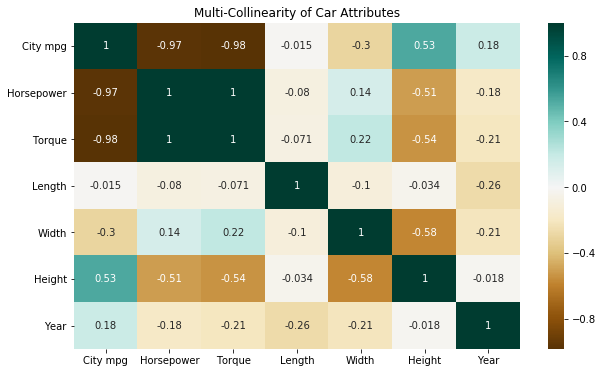

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_correlation.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Car Attributes')

#plt.savefig('correlation.png')

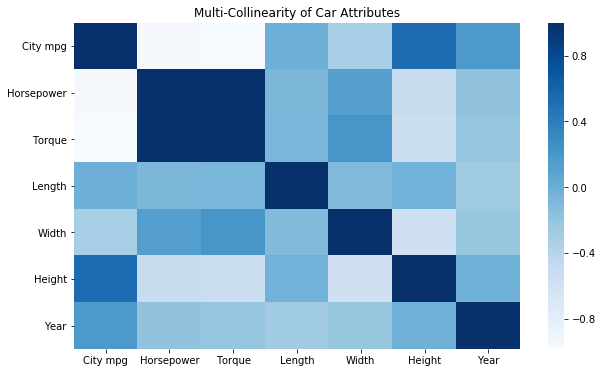

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_correlation.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Car Attributes')

#plt.savefig('correlationB.png')